In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<function matplotlib.pyplot.show(close=None, block=None)>

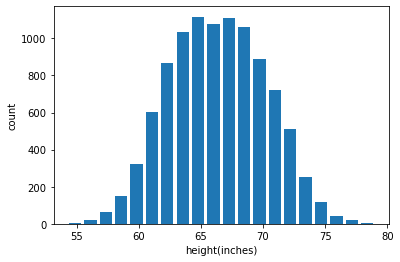

In [4]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('height(inches)')
plt.ylabel('count')
plt.show

In [5]:
df.Height.min()

54.2631333250971

In [6]:
df.Height.max()

78.9987423463896

In [7]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [8]:
df.Height.mean()

66.36755975482106

In [9]:
df.Height.std()

3.8475281207732324

In [10]:
#Outlier detection  using 3 standard deviation

In [11]:
upper_limit = df.Height.mean()+3*df.Height.std()
upper_limit

77.91014411714076

In [12]:
lower_limit = df.Height.mean()-3*df.Height.std()
lower_limit

54.82497539250136

In [13]:
df[(df.Height>upper_limit)|(df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [14]:
#Now remove these outliers and generate new dataframe

In [15]:
df_no_outlier_std_dev = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_no_outlier_std_dev.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [16]:
df_no_outlier_std_dev.shape

(9993, 3)

In [17]:
df.shape

(10000, 3)

In [18]:
#Outlier detection  using Z Score

In [19]:
df['zscore']=(df.Height-df.Height.mean())/df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [20]:
(73.847017-66.37)/3.84

1.9471398437499974

In [21]:
df[df['zscore']>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [22]:
df[df['zscore']<-3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [23]:
df[(df.zscore<-3)|(df.zscore>3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [24]:
#Remove the outliers and produce new dataframe


In [25]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [26]:
df_no_outliers.shape

(9993, 4)

In [27]:
df.shape


(10000, 4)

In [28]:
#outlier using IQR

In [29]:
df = pd.read_csv("heights.csv")
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [30]:
df.describe()

,height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


In [31]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(5.25, 6.175)

In [32]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [33]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.8625000000000003, 7.5625)

In [34]:
#here is the outlier

In [35]:
df[(df.height<lower_limit)|(df.height>upper_limit)]

,name,height
9,imran,14.5
12,yoseph,1.2


In [36]:
#remove outliers

In [37]:
df_no_outlier = df[(df.height>lower_limit)&(df.height<upper_limit)]
df_no_outlier

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [38]:
#dectect outlier using percentile

In [39]:
df = pd.read_csv("heights.csv")
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [40]:
max_thresold = df['height'].quantile(0.99)
max_thresold

13.537999999999995

In [41]:
df[df['height']>max_thresold]

,name,height
9,imran,14.5


In [42]:
min_thresold = df['height'].quantile(0.05)
min_thresold

3.6050000000000004

In [43]:
df[df['height']<min_thresold]

,name,height
12,yoseph,1.2


In [44]:
#remove outliers using percentile

In [45]:
df[(df['height']<max_thresold) & (df['height']>min_thresold)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [46]:
df = pd.read_csv('export_26550776.csv') 
df = pd.DataFrame(df, columns=['CREATED_TIMESTAMP', 'METRIC_VALUE_FLOAT'])


In [47]:
df['time'] = df['CREATED_TIMESTAMP']

In [48]:
df['time'] = pd.to_datetime(pd.Series(df['time']), format="%d-%b-%y %I.%M.%S %p")
df = df.rename(columns={"METRIC_VALUE_FLOAT": "cnt"})

In [49]:
df.index = df.time
df.head()

,CREATED_TIMESTAMP,cnt,time
time,,,
2019-04-29 23:50:00,29-APR-19 11.50.00 PM,0.93,2019-04-29 23:50:00
2019-04-29 23:55:00,29-APR-19 11.55.00 PM,1.50,2019-04-29 23:55:00
2019-04-29 23:30:00,29-APR-19 11.30.00 PM,1.43,2019-04-29 23:30:00
2019-04-29 23:45:00,29-APR-19 11.45.00 PM,1.74,2019-04-29 23:45:00
2019-04-29 23:00:00,29-APR-19 11.00.00 PM,1.97,2019-04-29 23:00:00


In [50]:
df['weekday'] = df.time.dt.weekday
df.head()

,CREATED_TIMESTAMP,cnt,time,weekday
time,,,,
2019-04-29 23:50:00,29-APR-19 11.50.00 PM,0.93,2019-04-29 23:50:00,0
2019-04-29 23:55:00,29-APR-19 11.55.00 PM,1.50,2019-04-29 23:55:00,0
2019-04-29 23:30:00,29-APR-19 11.30.00 PM,1.43,2019-04-29 23:30:00,0
2019-04-29 23:45:00,29-APR-19 11.45.00 PM,1.74,2019-04-29 23:45:00,0
2019-04-29 23:00:00,29-APR-19 11.00.00 PM,1.97,2019-04-29 23:00:00,0


In [51]:
df['hour'] = df.time.dt.hour
df.head()

,CREATED_TIMESTAMP,cnt,time,weekday,hour
time,,,,,
2019-04-29 23:50:00,29-APR-19 11.50.00 PM,0.93,2019-04-29 23:50:00,0,23
2019-04-29 23:55:00,29-APR-19 11.55.00 PM,1.50,2019-04-29 23:55:00,0,23
2019-04-29 23:30:00,29-APR-19 11.30.00 PM,1.43,2019-04-29 23:30:00,0,23
2019-04-29 23:45:00,29-APR-19 11.45.00 PM,1.74,2019-04-29 23:45:00,0,23
2019-04-29 23:00:00,29-APR-19 11.00.00 PM,1.97,2019-04-29 23:00:00,0,23


In [52]:
def day_splitter(df):
    l = []
    for day in range(7):
        d = df[df['weekday']==day]
        l.append(d)
    return l

In [53]:
dfs = day_splitter(df)
len(dfs)


7

In [54]:
print(len(dfs[0]))
dfs[0].head()

1545


,CREATED_TIMESTAMP,cnt,time,weekday,hour
time,,,,,
2019-04-29 23:50:00,29-APR-19 11.50.00 PM,0.93,2019-04-29 23:50:00,0,23
2019-04-29 23:55:00,29-APR-19 11.55.00 PM,1.50,2019-04-29 23:55:00,0,23
2019-04-29 23:30:00,29-APR-19 11.30.00 PM,1.43,2019-04-29 23:30:00,0,23
2019-04-29 23:45:00,29-APR-19 11.45.00 PM,1.74,2019-04-29 23:45:00,0,23
2019-04-29 23:00:00,29-APR-19 11.00.00 PM,1.97,2019-04-29 23:00:00,0,23


In [76]:
def anomaly_detector(df):
    m, s = df.mean()[0], df.std()[0]
    cutoff = s*3
    lower, upper = m - cutoff, m + cutoff
    anomalies = df['cnt'].apply(lambda x: x<lower or x>upper)
    idx = anomalies.values.reshape(-1)
    return idx

In [73]:
final_dfs = get_dfs(dfs)

In [74]:
len(final_dfs)

168

In [83]:
anomaly=[]

In [69]:
def hour_splitter(df):
    l = []
    for hour in range(24):
        try:
            d = df[df['hour']==hour]
            l.append(d)
        except KeyError: pass
    return l

In [70]:
def get_dfs(dfs):
    l = []
    for df in dfs:
        l.extend(hour_splitter(df))
    return l

In [71]:
df['hour'] = df.time.dt.hour
df.head()

,CREATED_TIMESTAMP,cnt,time,weekday,hour,SerialNo
0,29-APR-19 11.50.00 PM,0.93,2019-04-29 23:50:00,0,23,0
1,29-APR-19 11.55.00 PM,1.50,2019-04-29 23:55:00,0,23,1
2,29-APR-19 11.30.00 PM,1.43,2019-04-29 23:30:00,0,23,2
3,29-APR-19 11.45.00 PM,1.74,2019-04-29 23:45:00,0,23,3
4,29-APR-19 11.00.00 PM,1.97,2019-04-29 23:00:00,0,23,4


In [79]:
a = []
for l in df.time.tolist():
    if l in anomaly: a.append(1)
    else: a.append(0)
    

NameError: name 'anomaly' is not defined

In [84]:
for f_df in final_dfs:
    l = anomaly_detector(f_df)
    for i in range(len(l)):
        if l[i]: 
            d_time = f_df.iloc[i].time
            anomaly.append(d_time)
            

C:\Users\Riya\AppData\Local\Temp/ipykernel_13404/1692688199.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  m, s = df.mean()[0], df.std()[0]
C:\Users\Riya\AppData\Local\Temp/ipykernel_13404/1692688199.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m, s = df.mean()[0], df.std()[0]


In [85]:
df['SerialNo'] = range(len(df))
df.head()

,CREATED_TIMESTAMP,cnt,time,weekday,hour,SerialNo
0,29-APR-19 11.50.00 PM,0.93,2019-04-29 23:50:00,0,23,0
1,29-APR-19 11.55.00 PM,1.50,2019-04-29 23:55:00,0,23,1
2,29-APR-19 11.30.00 PM,1.43,2019-04-29 23:30:00,0,23,2
3,29-APR-19 11.45.00 PM,1.74,2019-04-29 23:45:00,0,23,3
4,29-APR-19 11.00.00 PM,1.97,2019-04-29 23:00:00,0,23,4


In [86]:
a = []
for l in df.time.tolist():
    if l in anomaly: a.append(1)
    else: a.append(0)
    

In [87]:
df['anomaly'] = a

In [88]:
df=df.reset_index(drop=True)

In [89]:
no_anomaly_df = df[df.anomaly==0].sort_values('time')
anomaly_df = df[df.anomaly==1].sort_values('time')
len(anomaly_df), len(no_anomaly_df)


(61, 11135)

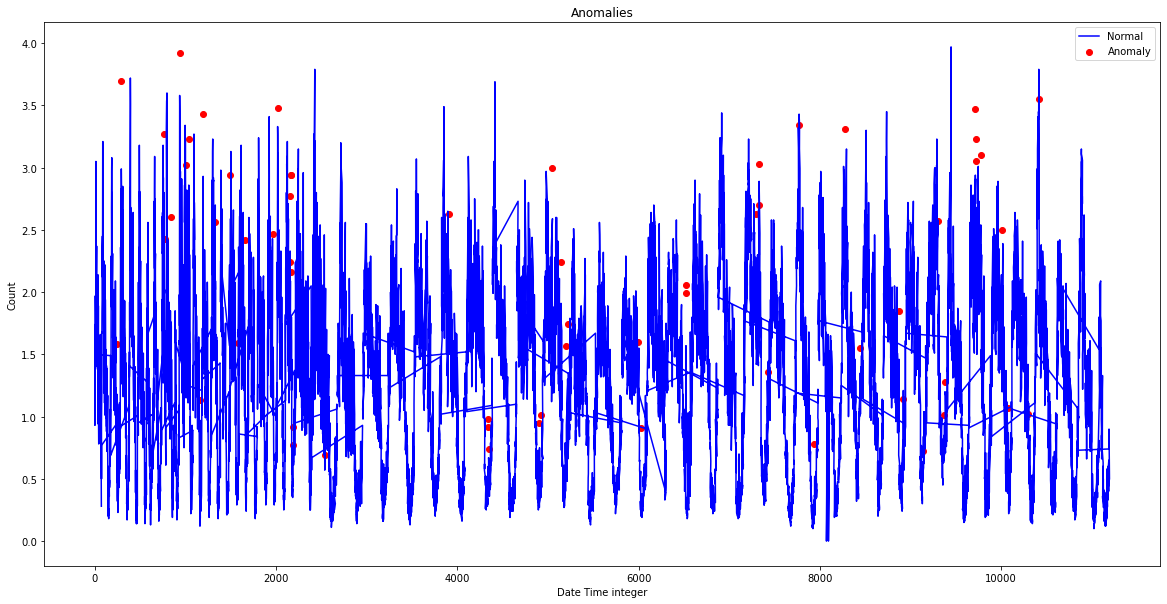

In [90]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(no_anomaly_df['SerialNo'], no_anomaly_df['cnt'], color='blue', label='Normal')
ax.scatter(anomaly_df['SerialNo'], anomaly_df['cnt'], color='red', label='Anomaly')
plt.title('Anomalies')
plt.xlabel('Date Time integer')
plt.ylabel('Count')
plt.legend()
plt.show()
